In [41]:
import pandas as pd
import itertools
import numpy as np
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt

Identifying All Sets

In [42]:
df = pd.read_csv(filepath_or_buffer='./basket_data.csv',header=None)

In [43]:
def cardinality_items(filepath):
  # read csv file
  df = pd.read_csv(filepath,header=None)
  df1 = pd.DataFrame()
  for i in range(df.shape[1]):
    df1 = pd.concat([df1,df[i]],ignore_index=True)
  df1.dropna(inplace=True)
  arr = df1[0].unique()
  # because some records have a space before them while some have not, remove all space before the name of items
  for i in range(len(arr)):
    arr[i] = arr[i].strip()
  return len(np.unique(arr))
print(cardinality_items('./basket_data.csv'))


21


In [44]:
def all_itemsets(filename):
  df = pd.read_csv(filename,header=None)
  df1 = pd.DataFrame()
  for i in range(df.shape[1]):
    df1 = pd.concat([df1,df[i]],ignore_index=True)
  df1.dropna(inplace=True)
  arr = df1[0].unique()
  for i in range(len(arr)):
    arr[i] = arr[i].strip()
  list_of_data = np.unique(arr)
  return get_powerset(list_of_data)

def get_powerset(S):
  powerSet = []
  for i in range(0,len(S)+1):
    for item in itertools.combinations(S,i):
      powerSet.append(list(item))
  return powerSet
all_itemsets('./basket_data.csv')

[[],
 ['asparagus'],
 ['beans'],
 ['beer'],
 ['bread'],
 ['butter'],
 ['chips'],
 ['corn'],
 ['diapers'],
 ['ketchup'],
 ['leeks'],
 ['macaroni'],
 ['milk'],
 ['okra'],
 ['pork'],
 ['raisins'],
 ['salmon'],
 ['sausages'],
 ['spaghetti'],
 ['spinach'],
 ['squid'],
 ['tomotes'],
 ['asparagus', 'beans'],
 ['asparagus', 'beer'],
 ['asparagus', 'bread'],
 ['asparagus', 'butter'],
 ['asparagus', 'chips'],
 ['asparagus', 'corn'],
 ['asparagus', 'diapers'],
 ['asparagus', 'ketchup'],
 ['asparagus', 'leeks'],
 ['asparagus', 'macaroni'],
 ['asparagus', 'milk'],
 ['asparagus', 'okra'],
 ['asparagus', 'pork'],
 ['asparagus', 'raisins'],
 ['asparagus', 'salmon'],
 ['asparagus', 'sausages'],
 ['asparagus', 'spaghetti'],
 ['asparagus', 'spinach'],
 ['asparagus', 'squid'],
 ['asparagus', 'tomotes'],
 ['beans', 'beer'],
 ['beans', 'bread'],
 ['beans', 'butter'],
 ['beans', 'chips'],
 ['beans', 'corn'],
 ['beans', 'diapers'],
 ['beans', 'ketchup'],
 ['beans', 'leeks'],
 ['beans', 'macaroni'],
 ['beans',

In [38]:
def probS(S,D):
  n = len(D)
  frequency = 0
  for item in D:
    item = set(item)
    if item == set(S):
      frequency+=1
  return frequency/n
    

Netflix Prize

question 1

In [46]:
def load_all(listOfFile):
  df = pd.DataFrame()
  for filePath in listOfFile:
    dfx = pd.read_csv('../Netflix Prize/'+filePath,header=None,names=['CustomerID','Rating','Date'])
    dfx['Movie_Id'] = dfx[dfx['Rating'].isna()]['CustomerID'].str.replace(':', '')
    dfx['Movie_Id'].fillna(method='ffill', inplace=True)
    dfx.dropna(inplace=True)
    df = pd.concat([df,dfx],ignore_index=True)
  return df

In [47]:
df = load_all(['combined_data_1.txt','combined_data_2.txt','combined_data_3.txt','combined_data_4.txt'])

In [ ]:
df.shape

(100480507, 4)

question 2

In [ ]:
data = df[['Date','Rating']]
data1 = data.groupby(['Date']).mean()
print(data1)

,Rating
Date,
1999-11-11,3.428571
1999-12-06,3.333333
1999-12-08,3.655172
1999-12-09,3.487500
1999-12-10,3.666667
...,...
2005-12-27,3.636133
2005-12-28,3.658005
2005-12-29,3.686704


In [ ]:
trace = go.Scatter(x = data1.index,
                   y = data1['Rating'],
                   marker = dict(color = '#db0000'))

In [ ]:
layout = dict(title = 'Average rating over times',
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Rating'))

In [ ]:
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

(array([ 4617990., 10132080., 28811247., 33750958., 23168232.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <BarContainer object of 5 artists>)

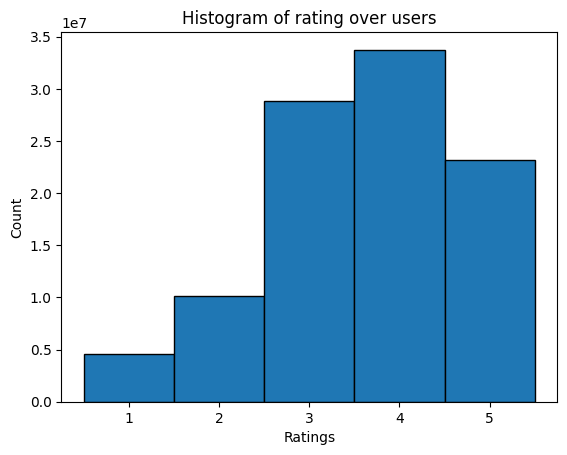

In [ ]:
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Histogram of rating over users')
plt.hist(df['Rating'],bins=[0.5,1.5,2.5,3.5,4.5,5.5],edgecolor='black' )

question 3

In [ ]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [ ]:
df1 = df[['Rating','Date','Movie_Id']]

In [ ]:
df1['Date'] = df1['Date'].dt.year

/var/folders/dd/sw3nwmhj41qd1843w2ntlv280000gn/T/ipykernel_75073/1911854896.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2 = df1.groupby(['Movie_Id','Date']).mean()
df2

Rating
Movie_Id Date          
1        2004  3.587940
         2005  3.841954
10       2002  2.846154
         2003  3.208333
         2004  3.211111
...                 ...
9999     2001  1.600000
         2002  1.979167
         2003  1.828571
         2004  2.000000
         2005  2.571429

[65433 rows x 1 columns]

In [ ]:
# 1. group Date and Movie and calcuate the mean of rating
df1 = df[['Rating','Date','Movie_Id']]
df1['Date'] = df1['Date'].astype('datetime64[ns]')
df1['Date'] = df1['Date'].dt.year
df2 = df1.groupby(['Movie_Id','Date']).mean()

In [ ]:
# 2. get index list
idx = df2.index.levels[0]

In [ ]:
# 3. access data and determin movie's trend over year
count = 0
for movie_id in idx:
  rating = df2.loc[movie_id].values
  if rating[-1]-rating[0]>0:
    count+=1
# calculate percentage
print(count/len(idx))
  

0.6407990996060776


question 4

In [ ]:
df3 = pd.read('../Netflix Prize/movie_titles.csv',encoding = "ISO-8859-1",header=None,names = ['Id', 'Year', 'Name'],usecols=[0,1,2])

In [ ]:
t = df3[['Name',"Year"]].groupby(['Name']).count()

In [ ]:
mask = t['Year']>1

In [ ]:
df3 = pd.read_csv('../Netflix Prize/movie_titles.csv',encoding = "ISO-8859-1",header=None,names = ['Id', 'Year', 'Name'],usecols=[0,1,2])
t = df3[['Name',"Year"]].groupby(['Name']).count()
mask = t['Year']>1
print(t[mask])

,Year
Name,
10,2
20,3
A Christmas Carol,3
A Dog of Flanders,2
A Farewell to Arms,2
...,...
Whatever It Takes,2
Where the Heart Is,2
Where the Red Fern Grows,2


In [ ]:
def read_title(filepath):
  data = []
  with open(filepath,encoding="ISO-8859-1") as fp:
    for row in fp.readlines():
      res = row.split(',',2)
      res[-1] = res[-1][:-4]
      data.append(res)
  return pd.DataFrame(data,columns=["Id",'Year',"Name"])
  
df4 = read_title('../Netflix Prize/movie_titles.txt')
t = df4[['Name',"Year"]].groupby(['Name']).count()
mask = t['Year']>1
print(t[mask])

                             Year
Name                             
20,000 Leagues Under the Se     3
A Christmas Carol               3
A Dog of Flanders               2
A Farewell to Arms              2
A Kiss Before Dying             2
...                           ...
We're No Angels                 2
Whatever It Takes               2
Where the Heart Is              2
Where the Red Fern Grows        2
Wonderland                      2

[369 rows x 1 columns]


In [ ]:
df2 = read_title('../Netflix Prize/movie_titles.txt')
print(df2)

,Id,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004,Fidel Castro: American Experience
17767,17768,2000,Epoch
17768,17769,2003,The Company


question 5

In [ ]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [ ]:
df2 = df2[df2['Year']!='NULL']

In [ ]:
df2.dropna(inplace=True)
df2['Year'] = df2['Year'].astype('datetime64[ns]')

/var/folders/dd/sw3nwmhj41qd1843w2ntlv280000gn/T/ipykernel_75073/1650498996.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/dd/sw3nwmhj41qd1843w2ntlv280000gn/T/ipykernel_75073/1650498996.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2['Year'] = df2['Year'].dt.year

/var/folders/dd/sw3nwmhj41qd1843w2ntlv280000gn/T/ipykernel_75073/995628907.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df3 = df2[['Id','Year']]

In [ ]:
df4 = pd.merge(df,df3,left_on='Movie_Id', right_on='Id')

In [ ]:
df4.drop(columns=['Id'], inplace=True)

In [ ]:
df4

,CustomerID,Rating,Date,Movie_Id,Year
0,1488844,3.0,2005-09-06,1,2003
1,822109,5.0,2005-05-13,1,2003
2,885013,4.0,2005-10-19,1,2003
3,30878,4.0,2005-12-26,1,2003
4,823519,3.0,2004-05-03,1,2003
...,...,...,...,...,...
100479537,1790158,4.0,2005-11-01,17770,2003
100479538,1608708,3.0,2005-07-19,17770,2003
100479539,234275,1.0,2004-08-07,17770,2003
100479540,255278,4.0,2004-05-28,17770,2003


In [ ]:
df4['Date'] = df4['Date'].dt.year

In [ ]:
df4['Diff'] = df4['Date']-df4['Year']

In [ ]:
df5 = df4[['Rating','Diff']]

In [ ]:
df5

,Rating,Diff
0,3.0,2
1,5.0,2
2,4.0,2
3,4.0,2
4,3.0,1
...,...,...
100479537,4.0,2
100479538,3.0,2
100479539,1.0,1
100479540,4.0,1


In [ ]:
df6 = df5.groupby(['Diff']).mean()

In [ ]:
df6.head()

,Rating
Diff,
-4,3.666667
-3,3.846154
-2,3.291667
-1,3.333801
0,3.481723


In [ ]:
import plotly.express as px
layout = dict(title = 'Average rating over time since released',
              xaxis = dict(title = 'Time since released (years)'),
              yaxis = dict(title = 'Rating'))
trace = go.Scatter(x = df6.index,
                   y = df6['Rating'])
fig = go.Figure(data=[trace], layout=layout)
fig.show()